In [2]:
%matplotlib inline

In [61]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigs

from graph_generator.community_graph import make_random_signed_graph, connect_communities
from helpers import signed_layout, draw_nodes, draw_edges


In [4]:
connect_communities?

In [7]:
comm_a

(<networkx.classes.graph.Graph at 0x7ff463ad8b38>,
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [69]:
# generate a graph with two polarized communities
n1 = 10
n2 = 20
comm_a0 = make_random_signed_graph(n1, 0.9, 0.05)
comm_a1 = make_random_signed_graph(n1, 0.9, 0.05)
comm_a, _ = connect_communities([comm_a0, comm_a1], edge_proba=0.5, neg_ratio=0.95)

comm_b0 = make_random_signed_graph(n2, 0.9, 0.05)
comm_b1 = make_random_signed_graph(n2, 0.9, 0.05)
comm_b, _ = connect_communities([comm_b0, comm_b1], edge_proba=0.5, neg_ratio=0.95)

g, _ = connect_communities([comm_a, comm_b], edge_proba=0.01, neg_ratio=0.5)

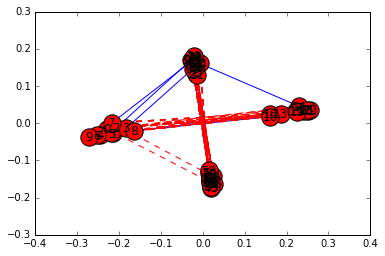

In [71]:
pos = signed_layout(g)
draw_nodes(g, pos)
draw_edges(g, pos)

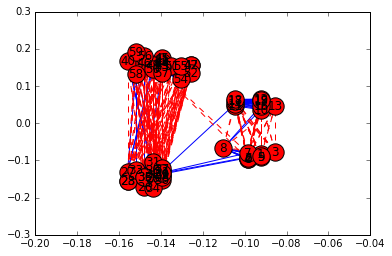

In [77]:
from helpers import pos_adj, neg_adj, normalized_laplacian
from scipy.linalg import sqrtm, inv

# visualization using geometric mean of Laplacian
# Reference: 
# Clustering Signed Networks with the Geometric Mean of Laplacians, NIPS 2016
# note: supporting only **small** graphs (internally using numpy.array)

A = nx.adjacency_matrix(g, weight='sign')
Ap = pos_adj(A).A
An = neg_adj(A).A
Lp = normalized_laplacian(Ap).A
Qn = normalized_laplacian(An, subtract=False).A

Lp_sq = sqrtm(Lp)
Lp_sq_inv = inv(Lp_sq)
L_gm = Lp_sq @ sqrtm(Lp_sq_inv @ Qn @ Lp_sq_inv) @ Lp_sq

w, pos_array = eigs(np.real(L_gm), k=2, which='SM')
pos_array = np.real(pos_array)
pos = {i: pos_array[i, :] for i in range(g.number_of_nodes())}


# draw
draw_nodes(g, pos, labels=None)
draw_edges(g, pos)